## Check the version of `tpot` and `python`

In [1]:
#Filter the unwanted warning
import warnings
warnings.simplefilter("ignore")

In [2]:
# check python version
from platform import python_version
print(python_version())

3.8.5


In [3]:
# check tpot version
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 0.11.6


## Importing necessary libraries 

In [4]:
# Importing necessary libraries 

import pickle

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tpot import TPOTClassifier
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


#Importing library for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## 1. Inspecting transfusion.data file

In [5]:
file_path = r"data\transfusion.data"

In [6]:
# Print out the first 5 lines from the transfusion.data file
a = !head -n5 D:\Study\MSC\Python\Internship\Technocolabs\data\transfusion.data

## 2. Loading the blood donations data

We now know that we are working with a typical CSV file (i.e., the delimiter is ,, etc.). We proceed to loading the data into memory.

In [7]:
# Import pandas
import pandas as pd

# Read in dataset
transfusion = pd.read_csv(file_path)

# Print out the first rows of our dataset
transfusion.head(60)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


## 3. Inspecting transfusion DataFrame

Let's briefly return to our discussion of RFM model. RFM stands for Recency, Frequency and Monetary Value and it is commonly used in marketing for identifying your best customers. In our case, our customers are blood donors.

RFMTC is a variation of the RFM model. Below is a description of what each column means in our dataset:

- R (Recency - months since the last donation)
- F (Frequency - total number of donation)
- M (Monetary - total blood donated in c.c.)
- T (Time - months since the first donation)
- a binary variable representing whether he/she donated blood in March 2007 (1 stands for donating blood; 0 stands for not donating blood)

It looks like every column in our DataFrame has the numeric type, which is exactly what we want when building a machine learning model. Let's verify our hypothesis.

In [8]:
# Print a concise summary of transfusion DataFrame
transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


## 4. Creating target column

We are aiming to predict the value in whether he/she donated blood in March 2007 column. Let's rename this it to target so that it's more convenient to work with.

In [9]:
# Rename target column as 'target' for brevity 
transfusion.rename(
    columns={'whether he/she donated blood in March 2007': 'target'},
    inplace=True
)

# Print out the first 8 rows
transfusion.head()


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## 5. Checking target incidence

We want to predict whether or not the same donor will give blood the next time the vehicle comes to campus. The model for this is a binary classifier, meaning that there are only 2 possible outcomes:

- 0 - the donor will not give blood
- 1 - the donor will give blood

Target incidence is defined as the number of cases of each individual target value in a dataset. That is, how many 0s in the target column compared to how many 1s? Target incidence gives us an idea of how balanced (or imbalanced) is our dataset.

In [10]:
# Print target incidence proportions, rounding output to 3 decimal places
transfusion.target.value_counts(normalize=True).round(3)

0    0.762
1    0.238
Name: target, dtype: float64

## 6. Splitting transfusion into train and test datasets

We'll now use `train_test_split()` method to split transfusion DataFrame.

Target incidence informed us that in our dataset 0s appear 76% of the time. We want to keep the same structure in train and test datasets, i.e., both datasets must have 0 target incidence of 76%. This is very easy to do using the `train_test_split()` method from the `scikit learn` library - all we need to do is specify the `stratify` parameter. In our case, we'll stratify on the target column.

In [11]:
# Import train_test_split method
from sklearn.model_selection import train_test_split

# Split transfusion DataFrame into
# X_train, X_test, y_train and y_test datasets,
# stratifying on the `target` column
X_train, X_test, y_train, y_test = train_test_split(
    transfusion.drop(columns='target'),
    transfusion.target,
    test_size=0.267,
    random_state=42,
    stratify=transfusion.target
)

# Print out the first 2 rows of X_train
X_train.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
147,2,2,500,11
221,4,1,250,4


In [12]:
X_test,y_test

(     Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
 105                 6                 17                   4250             70
 250                11                  2                    500             11
 284                11                  5                   1250             33
 219                 4                  1                    250              4
 304                14                  6                   1500             34
 ..                ...                ...                    ...            ...
 381                14                  1                    250             14
 705                16                  1                    250             16
 539                 2                  2                    500              4
 118                 1                  7                   1750             57
 422                21                  2                    500             23
 
 [200 rows x 4 columns],
 105    0
 25

## 7. Selecting model using TPOT

TPOT is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.

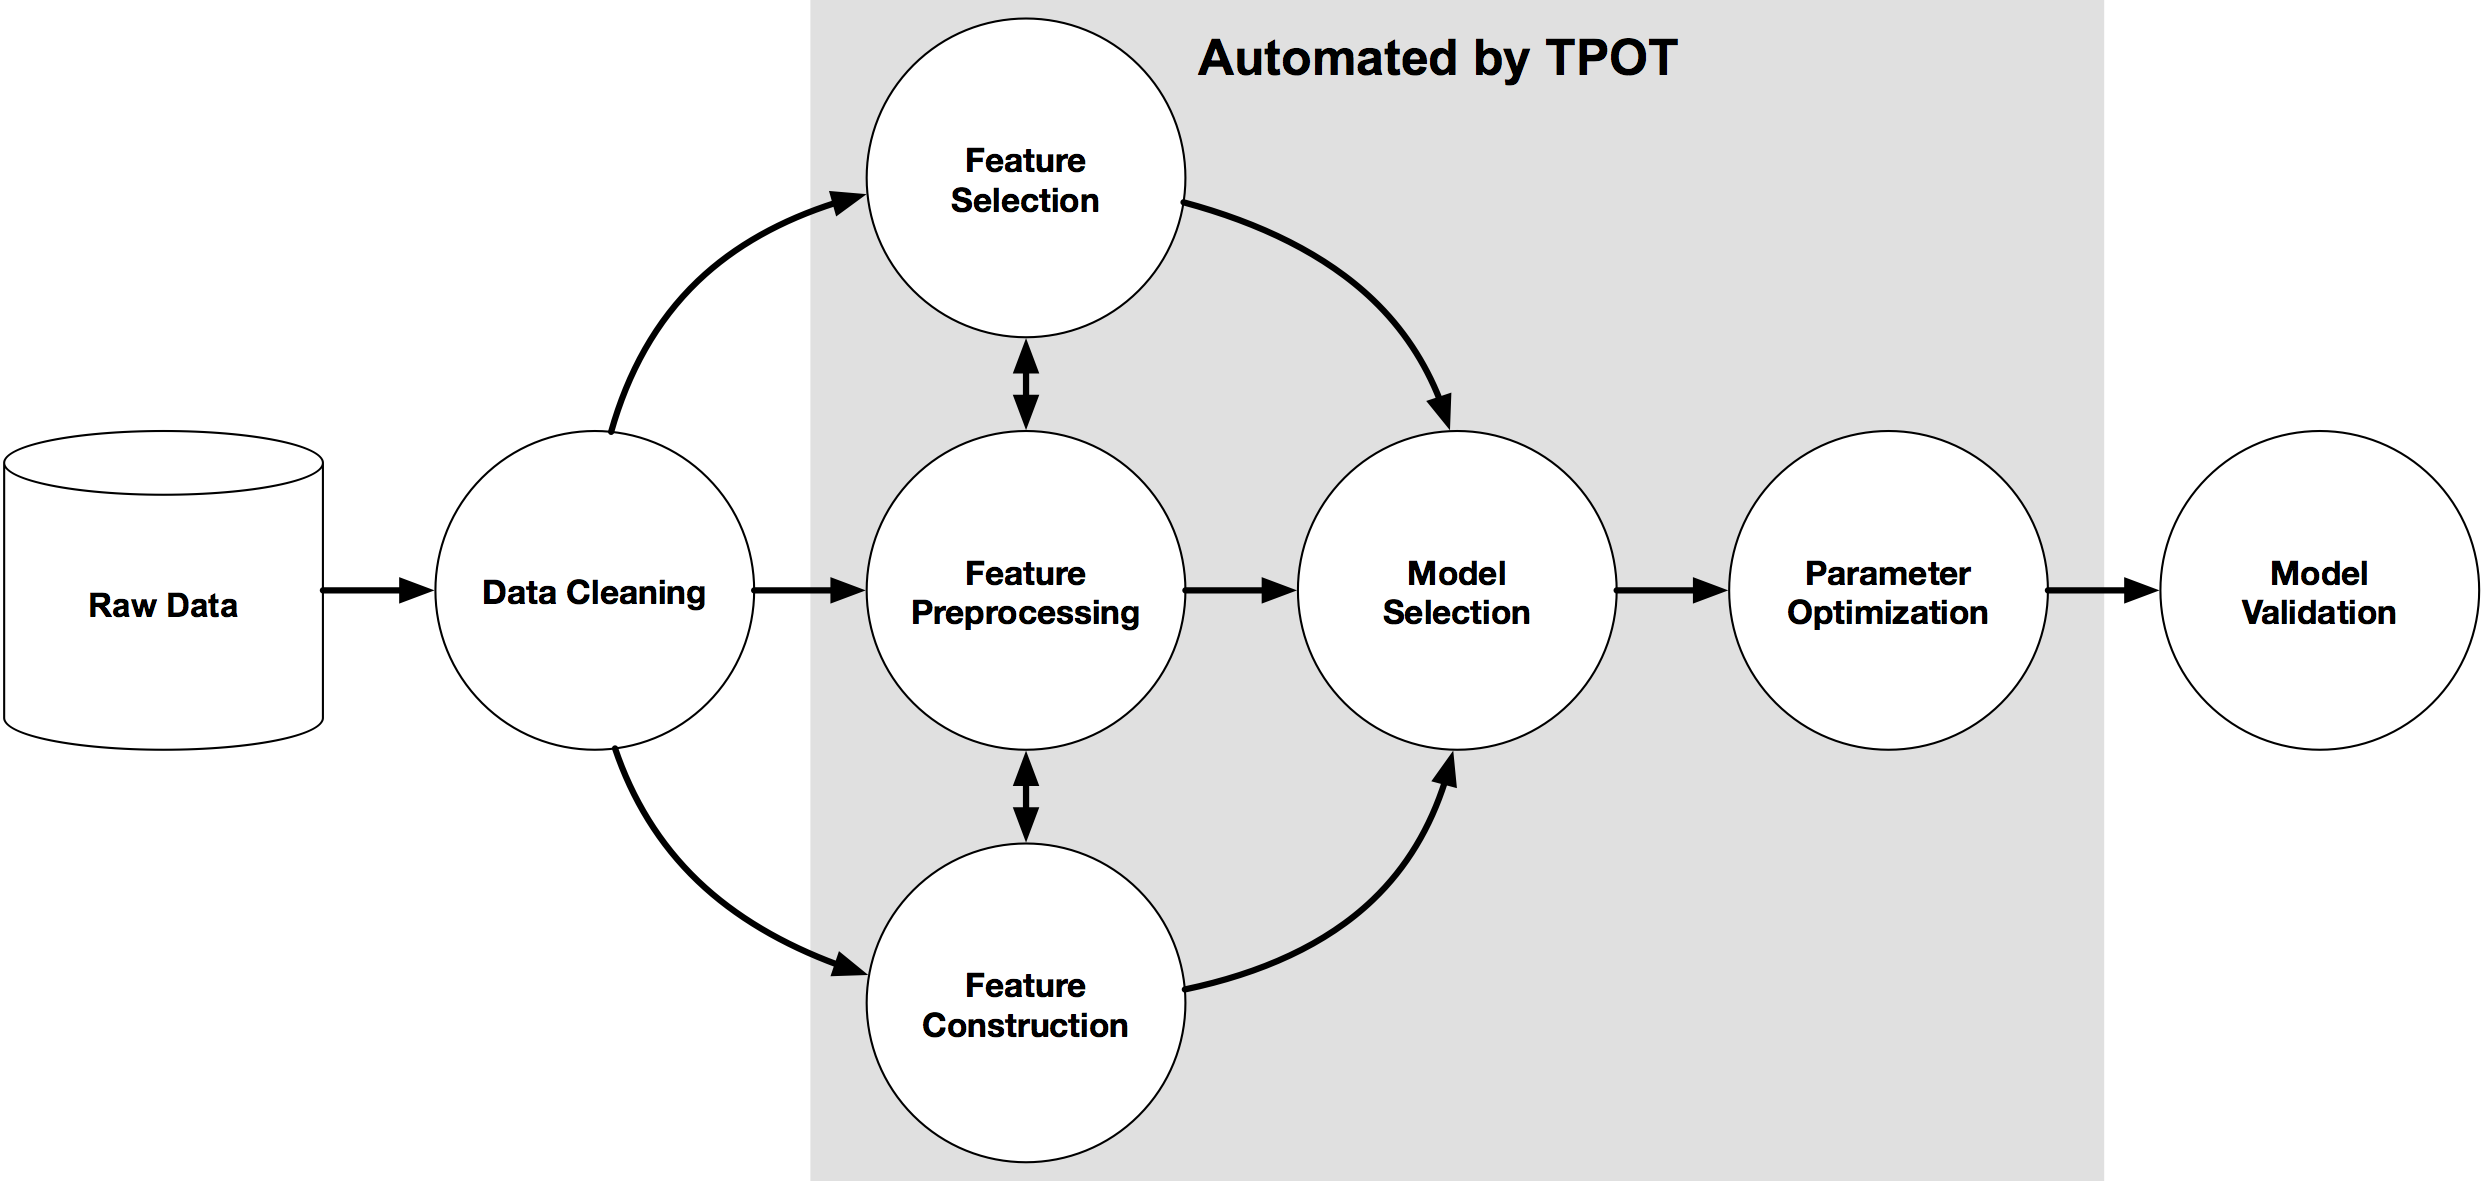

TPOT will automatically explore hundreds of possible pipelines to find the best one for our dataset. Note, the outcome of this search will be a [scikit-learn pipeline]('https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), meaning it will include any pre-processing steps as well as the model.

We are using TPOT to help us zero in on one model that we can then explore and optimize further.

In [13]:
# Import TPOTClassifier and roc_auc_score
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

# Instantiate TPOTClassifier
tpot = TPOTClassifier(
                        generations=5,
                        population_size=20,
                        verbosity=2,
                        scoring='roc_auc',
                        random_state=42,
                        disable_update_check=True,
                        config_dict='TPOT light'
                    )
tpot.fit(X_train, y_train)


# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')


Generation 1 - Current best internal CV score: 0.7331987289818616

Generation 2 - Current best internal CV score: 0.7331987289818616

Generation 3 - Current best internal CV score: 0.7331987289818616

Generation 4 - Current best internal CV score: 0.7331987289818616

Generation 5 - Current best internal CV score: 0.7400265898759875

Best pipeline: MultinomialNB(Normalizer(FeatureAgglomeration(input_matrix, affinity=manhattan, linkage=complete), norm=l1), alpha=0.001, fit_prior=False)

AUC score: 0.7506

Best pipeline steps:
1. FeatureAgglomeration(affinity='manhattan', linkage='complete')
2. Normalizer(norm='l1')
3. MultinomialNB(alpha=0.001, fit_prior=False)


In [14]:
pickle.dump(tpot.fitted_pipeline_, open('tpot.pkl', 'wb'))

## 8. Checking the variance

TPOT picked LogisticRegression as the best model for our dataset with no pre-processing steps, giving us the AUC score of 0.7850. This is a great starting point. Let's see if we can make it better.

One of the assumptions for linear regression models is that the data and the features we are giving it are related in a linear fashion, or can be measured with a linear distance metric. If a feature in our dataset has a high variance that's an order of magnitude or more greater than the other features, this could impact the model's ability to learn from other features in the dataset.

Correcting for high variance is called normalization. It is one of the possible transformations you do before training a model. Let's check the variance to see if such transformation is needed.

In [15]:
# X_train's variance, rounding the output to 3 decimal places
X_train.var().round(3)

Recency (months)              69.528
Frequency (times)             34.320
Monetary (c.c. blood)    2145013.569
Time (months)                608.358
dtype: float64

## 9. Log normalization

`Monetary (c.c. blood)'`s variance is very high in comparison to any other column in the dataset. This means that, unless accounted for, this feature may get more weight by the model (i.e., be seen as more important) than any other feature.

One way to correct for high variance is to use log normalization.

In [16]:
# Import numpy
import numpy as np

# Copy X_train and X_test into X_train_normed and X_test_normed
X_train_normed, X_test_normed = X_train.copy(), X_test.copy()

# Specify which column to normalize
col_to_normalize = 'Monetary (c.c. blood)'

# Log normalization
for df_ in [X_train_normed, X_test_normed]:
    # Add log normalized column
    df_['monetary_log'] = np.log(df_[col_to_normalize])
    # Drop the original column
    df_.drop(columns=col_to_normalize, inplace=True)

# Check the variance for X_train_normed
X_train_normed.var().round(3)

Recency (months)      69.528
Frequency (times)     34.320
Time (months)        608.358
monetary_log           0.834
dtype: float64

## 10. Training the linear regression model
The variance looks much better now. Notice that now `Time (months)` has the largest variance, but it's not the orders of magnitude higher than the rest of the variables, so we'll leave it as is.

We are now ready to train the linear regression model.

In [17]:
# Importing modules
from sklearn import linear_model

# Instantiate LogisticRegression
logreg = linear_model.LogisticRegression(
    solver='liblinear',
    random_state=42
)

# Train the model
logreg.fit(X_train_normed, y_train)

# AUC score for tpot model
logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test_normed)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')

pickle.dump(logreg, open('logisticregression.pkl', 'wb'))


AUC score: 0.7867


In [18]:
infile = open('logisticregression.pkl','rb')
logisticregression_model = pickle.load(infile)

In [19]:
X_train

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
147,2,2,500,11
221,4,1,250,4
640,11,8,2000,52
746,39,1,250,39
347,11,1,250,11
...,...,...,...,...
623,11,6,1500,28
681,4,2,500,46
15,2,5,1250,11
366,23,15,3750,57


In [20]:
logisticregression_model.predict([[2, 50, 12500, 98]])

array([0], dtype=int64)

In [21]:
prediction = logreg.predict([[2, 50, 12500, 98]])
prediction

array([0], dtype=int64)

In [22]:
prediction = str(prediction[0])
if prediction == '0':
    prediction = prediction.replace(prediction, "No")
    print(prediction)
else :
    prediction = prediction.replace(prediction, "Yes")
    print(prediction)


No


In [23]:
#Predicting on the test data
pred=logreg.predict(X_test_normed)

#printing the confusion matrix
confusion_matrix(pred,y_test)

array([[149,  43],
       [  3,   5]], dtype=int64)

## 11. Conclusion
The demand for blood fluctuates throughout the year. As one prominent example, blood donations slow down during busy holiday seasons. An accurate forecast for the future supply of blood allows for an appropriate action to be taken ahead of time and therefore saving more lives.

In this notebook, we explored automatic model selection using TPOT and AUC score we got was 0.7850. This is better than simply choosing 0 all the time (the target incidence suggests that such a model would have 76% success rate). We then log normalized our training data and improved the AUC score by 0.5%. In the field of machine learning, even small improvements in accuracy can be important, depending on the purpose.

Another benefit of using logistic regression model is that it is interpretable. We can analyze how much of the variance in the response variable (target) can be explained by other variables in our dataset.

In [24]:
# Importing itemgetter
from operator import itemgetter

# Sort models based on their AUC score from highest to lowest
sorted(
    [('tpot', tpot_auc_score), ('logreg', logreg_auc_score)],
    key=itemgetter(1),
    reverse=True)

[('logreg', 0.7866639254385965), ('tpot', 0.7506167763157895)]

# **Exploratory Data Analysis on Blood Donation Dataset**

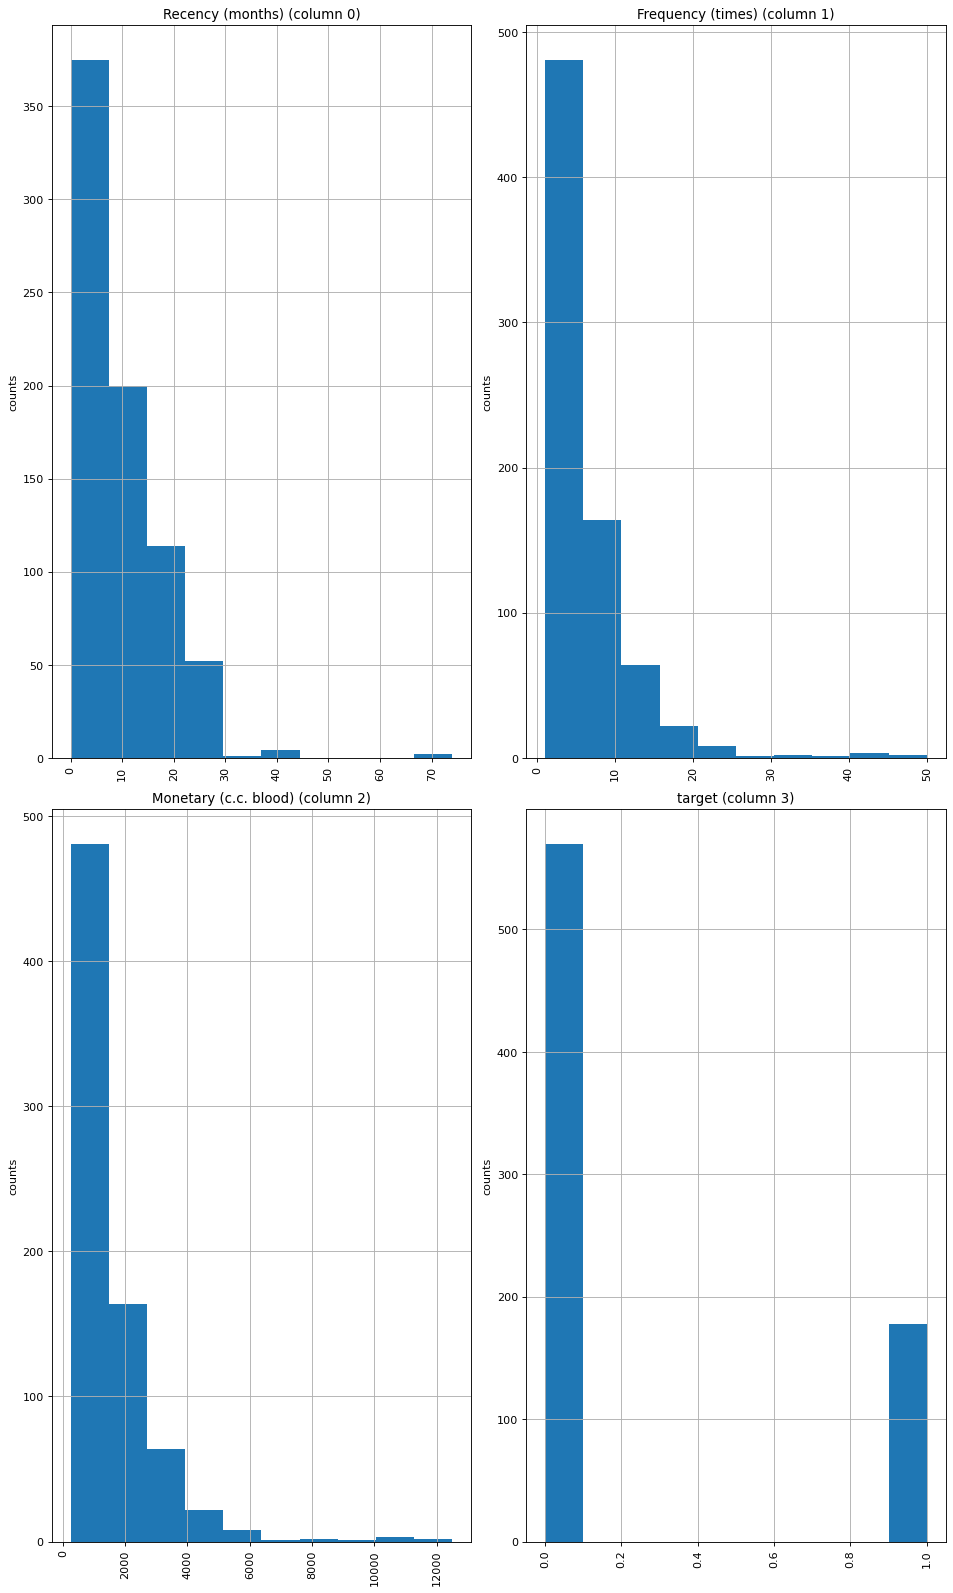

In [25]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
plotPerColumnDistribution(transfusion, 4, 2)    

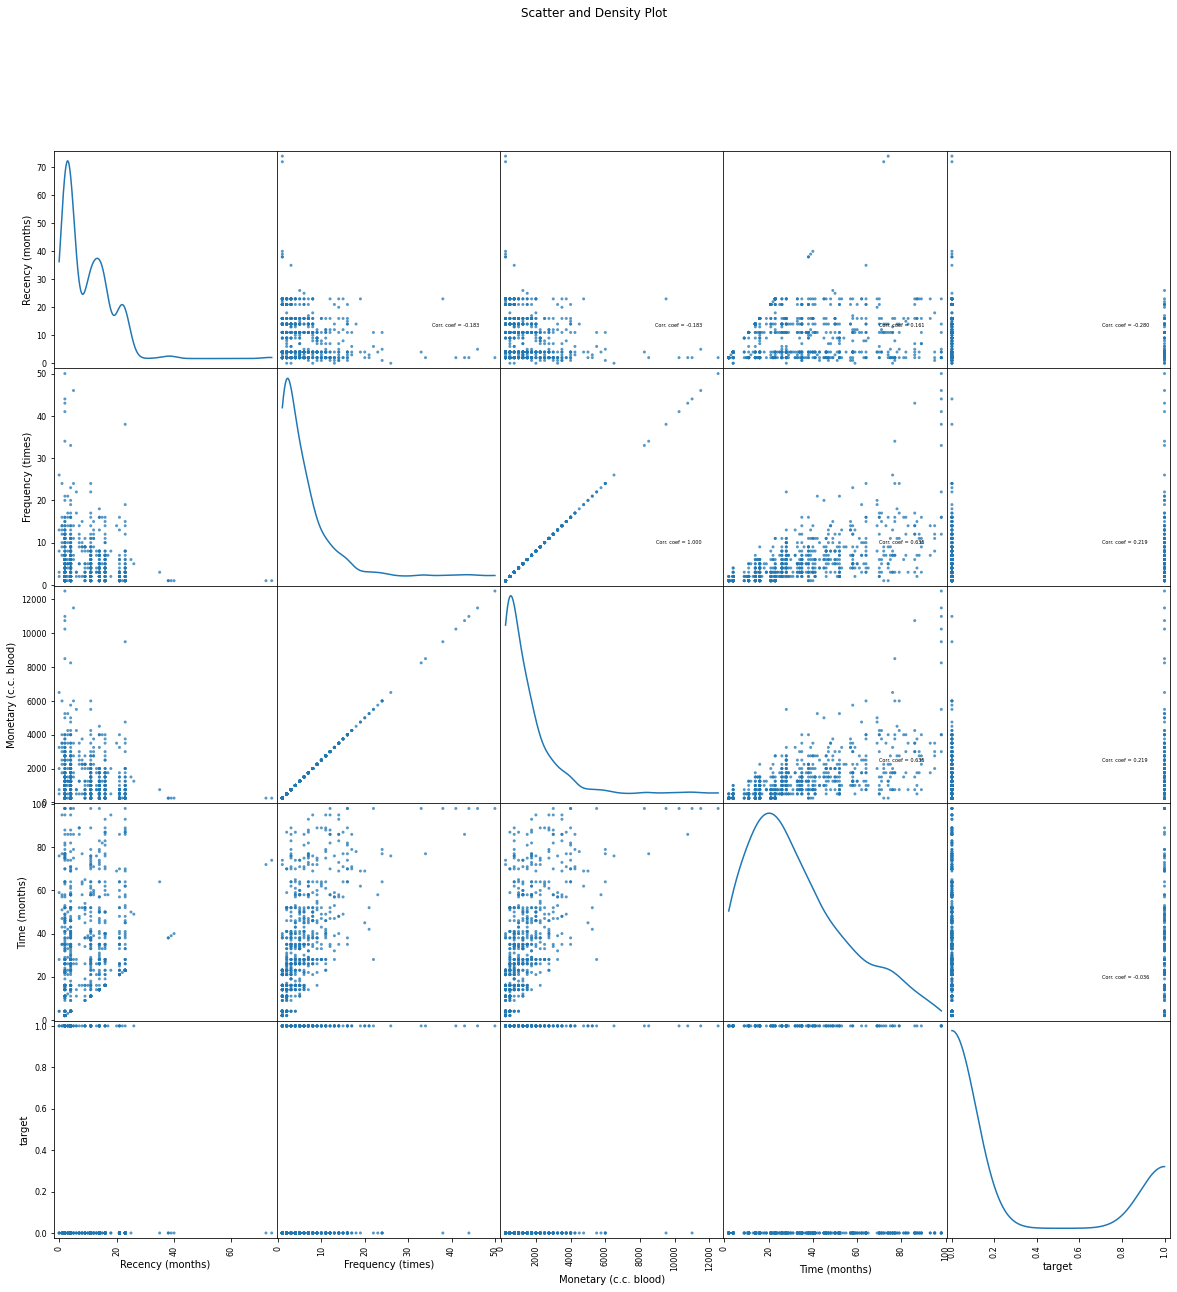

In [26]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
plotScatterMatrix(transfusion, 20, 5)

## Feature  Analysis

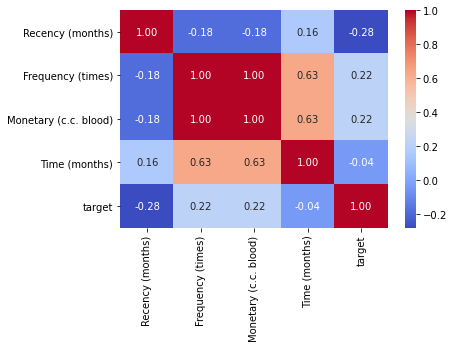

In [27]:
g = sns.heatmap(transfusion[["Recency (months)", "Frequency (times)","Monetary (c.c. blood)","Time (months)","target"]].corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

Only Recency seems to have a significative correlation with the class probability.


It doesn’t mean that the other features are not useful. Frequency in these features can be correlated with the class. To determine this, we need to explore in detail these features.

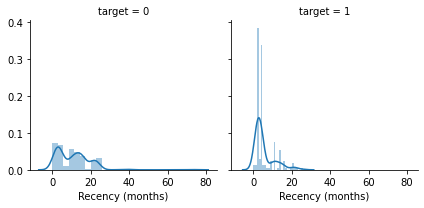

In [28]:
g = sns.FacetGrid(transfusion, col='target')
g = g.map(sns.distplot, "Recency (months)")

We notice that “Recency (months)” distributions are not the same in class 1 and class 0 subpopulations. Indeed, there is a peak corresponding to the people who have donated recently(in 1–2 months) will donate blood.

It seems that people have donated recently are more likely to donate blood.

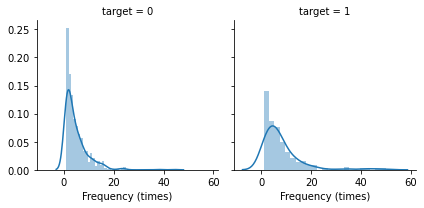

In [29]:
g1 = sns.FacetGrid(transfusion, col='target')
g1 = g1.map(sns.distplot, "Frequency (times)")

We notice that “Frequency (times)” are not the same in class 1 and class 0 subpopulations. Indeed, there is a peak corresponding to the people who have donated only 0–1 time will not donate blood and who have donated 2–3 will likely donate.

It seems that people have donated more number of times are more likely to donate blood.

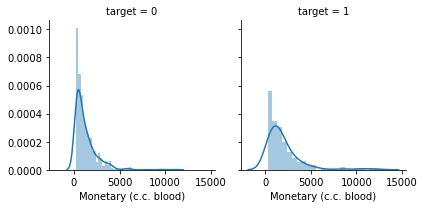

In [30]:
g2 = sns.FacetGrid(transfusion, col='target')
g2 = g2.map(sns.distplot, "Monetary (c.c. blood)")

We notice that “Monetary (c.c. blood)” distributions are not the same in class 1 and class 0 subpopulations. Indeed, there is a peak corresponding to the people who have just donated recently(in 6–20 months) will not donate blood.

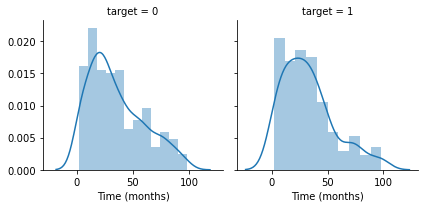

In [31]:
g3 = sns.FacetGrid(transfusion, col='target')
g3 = g3.map(sns.distplot, "Time (months)")

### Correlation between Frequency and Monetary

<Figure size 1080x720 with 0 Axes>

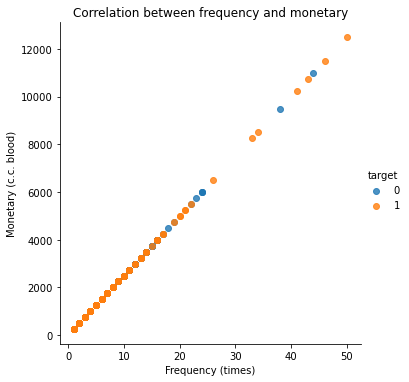

In [32]:
plt.figure(figsize=(15,10));
g4 = sns.lmplot(x='Frequency (times)',
               y='Monetary (c.c. blood)',
               hue='target',
               fit_reg=False,
               data=transfusion);
g4 = plt.title("Correlation between frequency and monetary");
plt.show();

From the graph, we can see that Frequency and monetary values are highly correlated. So we can use only the frequency.

## Feature Scaling

In [33]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

In [34]:
X_train_scaled

array([[-0.91583332, -0.63508532, -0.63508532, -1.00288514],
       [-0.67575838, -0.80593792, -0.80593792, -1.28694831],
       [ 0.1645039 ,  0.39003031,  0.39003031,  0.66091338],
       ...,
       [-0.91583332, -0.12252751, -0.12252751, -1.00288514],
       [ 1.60495354,  1.58599854,  1.58599854,  0.86381564],
       [ 0.76469125, -0.29338011, -0.29338011, -0.51591972]])

## Cross-Validation Models
Cross-validation (CV) is one of the techniques used to test the effectiveness of machine learning models, it is also a resampling procedure used to evaluate a model if we have limited data. To perform CV we need to keep aside a sample/portion of the data on which is not used to train the model, later use this sample for testing/validating. We compared 10 popular classifiers and evaluate the mean accuracy of each of them by a stratified K fold cross-validation procedure, 
“SVC”, 

“Decision Tree”, 

“AdaBoost”, 

“Random Forest”, 

“Extra Trees”, 

“Gradient Boosting”, 

“Multiple Layer perceptron”, 

“KNN”, 

“Logistic regression”, 

“Linear Discriminant Analysis”.

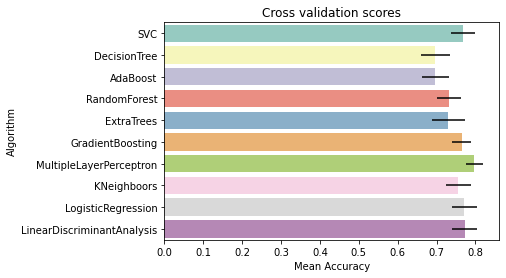

In [35]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)
# Modeling step Test differents algorithms 
random_state = 7
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_scaled, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

By seeing the figure we can see that SVC, Random Forest, Gradient Boosting, Logistic Regression Classifiers will work the best.

## Hyperparameter tunning for best models
I performed a grid search optimization for Random Forest, Extra Trees, Gradient Boosting, SVC classifiers. I set the "n_jobs" parameter to 4 since i have 4 cpu . The computation time is clearly reduced.

In [36]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [80, 90, 100, 110],
              "max_features": [2, 3],
              "min_samples_split": [8, 10, 12],
              "min_samples_leaf": [3, 4, 5],
              "bootstrap": [False],
              "n_estimators" :[100, 200, 300, 1000],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train_scaled,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

pickle.dump(gsRFC, open('RandomForestClassifier.pkl', 'wb'))

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   22.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  8.6min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 13.3min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 18.6min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 25.6min
[Parallel(n_jobs=4)]: Done 2880 out of 2880 | elapsed: 31.0min finished


In [37]:
gsRFC.predict([[9,17,4250,70]])

array([0], dtype=int64)

In [38]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [2, 3],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100, 200, 300, 1000],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train_scaled,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

pickle.dump(gsExtC, open('ExtraTreesClassifier.pkl', 'wb'))

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   40.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  9.0min finished


In [39]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train_scaled,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

pickle.dump(gsGBC, open('GradientBoostingClassifier.pkl', 'wb'))

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    7.7s
[Parallel(n_jobs=4)]: Done 240 tasks      | elapsed:   24.8s
[Parallel(n_jobs=4)]: Done 490 tasks      | elapsed:   50.5s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  1.2min finished


In [40]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train_scaled,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

pickle.dump(gsSVMC, open('SVCClassifier.pkl', 'wb'))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   31.7s finished


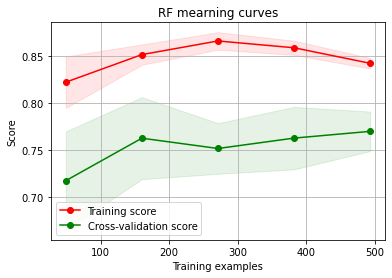

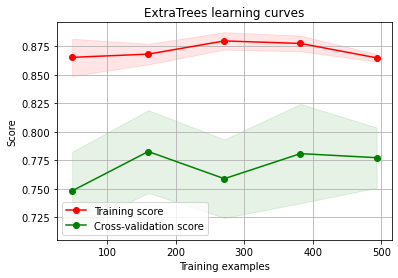

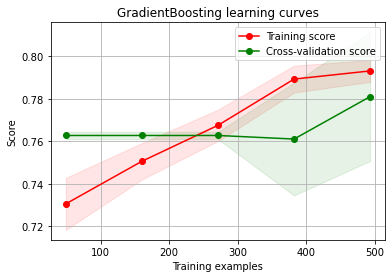

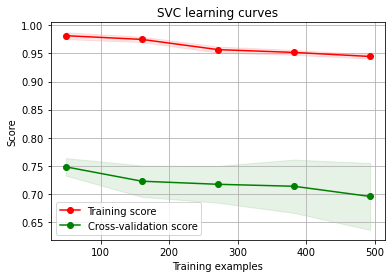

In [41]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,y_train,cv=kfold)

By looking at the learning curve GradientBoosting and ExtraTrees classifiers tend to overfit the training set. According to the growing cross-validation curves Random Forest classifier and SVC seems to better generalize the prediction since the training and cross-validation curves are close together.

## Final Conclusion from my side

Now we can target the people who are interested in donating blood and which will results in getting more volunteers and we can save more people.